# Credit Card Fraud ‑ Logistic Regression
Minimal notebook with key visuals

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,roc_auc_score, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay)

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


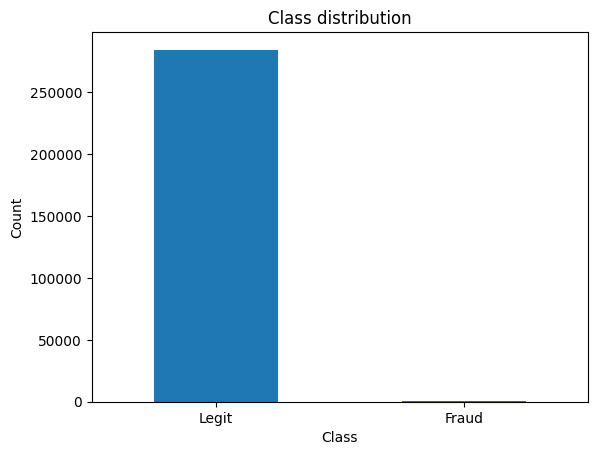

In [3]:
plt.figure()
df['Class'].value_counts().sort_index().plot(kind='bar')
plt.title('Class distribution')
plt.xticks([0,1], ['Legit','Fraud'], rotation=0)
plt.ylabel('Count')
plt.show()

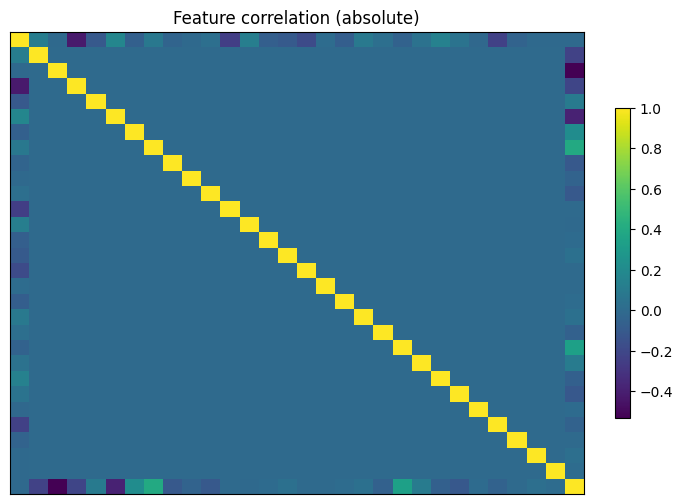

In [5]:
corr = df.drop('Class', axis=1).corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.title('Feature correlation (absolute)')
plt.colorbar(fraction=0.025)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [8]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1)
model.fit(X_train_s, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


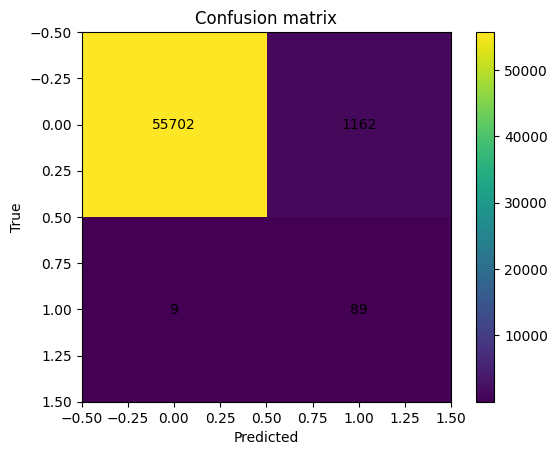

In [10]:
cm = confusion_matrix(y_test, model.predict(X_test_s))
plt.figure()
plt.imshow(cm)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.colorbar(fraction=0.046)
plt.show()

In [11]:
print(classification_report(y_test, model.predict(X_test_s), digits=4))
print('ROC AUC:', roc_auc_score(y_test, model.predict_proba(X_test_s)[:,1]))
print('Average precision:', average_precision_score(y_test, model.predict_proba(X_test_s)[:,1]))

              precision    recall  f1-score   support

           0     0.9998    0.9796    0.9896     56864
           1     0.0711    0.9082    0.1319        98

    accuracy                         0.9794     56962
   macro avg     0.5355    0.9439    0.5608     56962
weighted avg     0.9982    0.9794    0.9881     56962

ROC AUC: 0.9875062627048569
Average precision: 0.6589590207037719


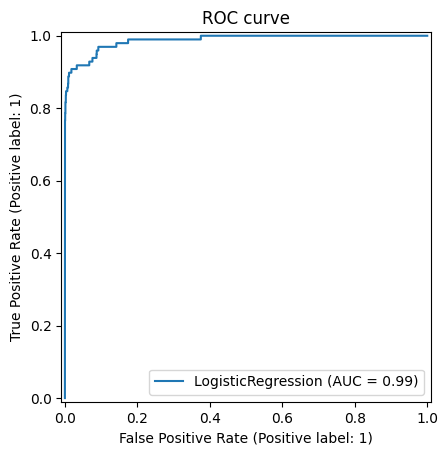

In [12]:
RocCurveDisplay.from_estimator(model, X_test_s, y_test)
plt.title('ROC curve')
plt.show()

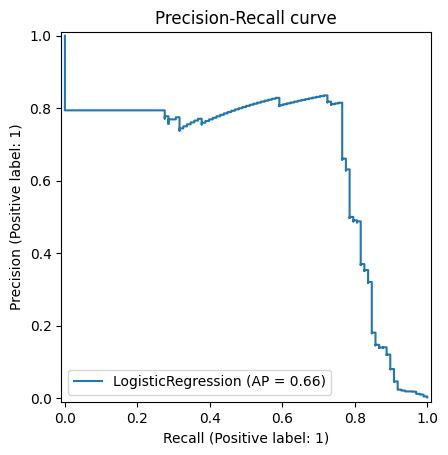

In [13]:
PrecisionRecallDisplay.from_estimator(model, X_test_s, y_test)
plt.title('Precision‑Recall curve')
plt.show()

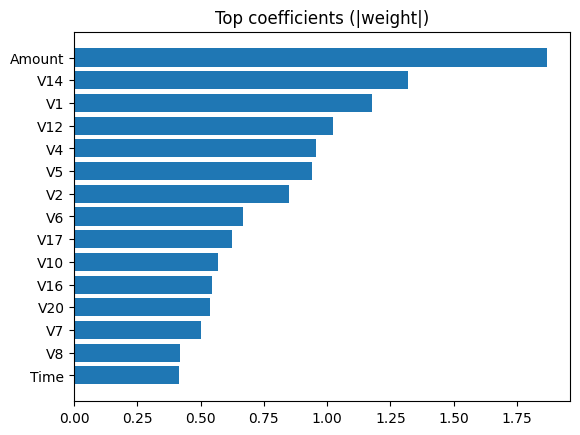

In [14]:
coef = pd.Series(model.coef_[0], index=X.columns)
top = coef.abs().sort_values(ascending=False).head(15)
plt.figure()
plt.barh(top.index[::-1], top.values[::-1])
plt.title('Top coefficients (|weight|)')
plt.show()